# Wildfire Data Prediction: Figures and Tables for Paper
#### Fire Atlas Dataset + NCDC GSOM + NCDC Monthly Normals

Andrew McDonald // CSE 847 // April 2021

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.cm import viridis
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

pd.set_option("display.max_rows", 11)

## Feature Data

In [9]:
X = pd.read_csv("data/X.csv")
X.shape

(9925, 140)

In [12]:
# count weather-related columns
weather_cols = [col for col in X.columns if col[0].isupper()]

# count gsom and mlycolumns
mly_cols = [col for col in weather_cols if col[0:3]=="MLY"]
gsom_cols = [col for col in weather_cols if col[0:3] != "MLY"]

len(mly_cols), len(gsom_cols)

(77, 27)

In [13]:
len(weather_cols)

104

In [15]:
dir_cols = [col for col in X.columns if "dir_" in col]
land_cols = [col for col in X.columns if "land_" in col]
len(dir_cols), len(land_cols)

(7, 13)

## Visualize Features

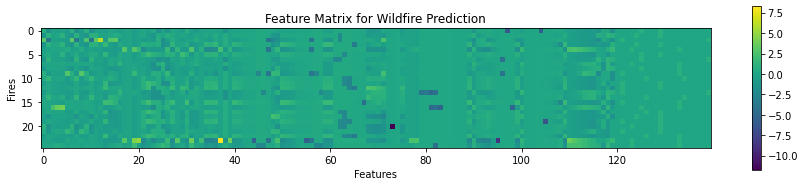

In [44]:
fig, ax = plt.subplots(figsize=(15, 3))

X_im = X.sample(n=25, replace=False, axis=0, random_state=1)
im = ax.imshow(X_im)
ax.set_title("Feature Matrix for Wildfire Prediction")
ax.set_xlabel("Features")
ax.set_ylabel("Fires")
plt.colorbar(im)
fig.savefig("final/feature_matrix.png")
plt.show()

In [49]:
with pd.option_context("display.max_columns", None):
    display(pd.DataFrame(list(X.columns)).T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
0,latitude,longitude,expansion,fire_line,speed,gsom_elevation,gsom_latitude,gsom_longitude,normal_elevation,normal_latitude,normal_longitude,distance_from_gsom,distance_from_normal,CLDD,DP01,DP10,DP1X,DSNW,DT00,DT32,DX32,DX70,DX90,DYNT,DYSN,DYXP,DYXT,EMNT,EMSN,EMXP,EMXT,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,DSND,DYSD,EMSD,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,MLY-DUTR-NORMAL,MLY-DUTR-STDDEV,MLY-GRDD-BASE40,MLY-GRDD-BASE45,MLY-GRDD-BASE50,MLY-GRDD-BASE55,MLY-GRDD-BASE57,MLY-GRDD-BASE60,MLY-GRDD-BASE65,MLY-GRDD-BASE70,MLY-GRDD-BASE72,MLY-GRDD-TB4886,MLY-GRDD-TB5086,MLY-HTDD-BASE40,MLY-HTDD-BASE45,MLY-HTDD-BASE50,MLY-HTDD-BASE55,MLY-HTDD-BASE57,MLY-HTDD-BASE60,MLY-HTDD-NORMAL,MLY-PRCP-25PCTL,MLY-PRCP-50PCTL,MLY-PRCP-75PCTL,MLY-PRCP-AVGNDS-GE001HI,MLY-PRCP-AVGNDS-GE010HI,MLY-PRCP-AVGNDS-GE050HI,MLY-PRCP-AVGNDS-GE100HI,MLY-PRCP-NORMAL,MLY-SNOW-25PCTL,MLY-SNOW-50PCTL,MLY-SNOW-75PCTL,MLY-SNOW-AVGNDS-GE001TI,MLY-SNOW-AVGNDS-GE010TI,MLY-SNOW-AVGNDS-GE030TI,MLY-SNOW-AVGNDS-GE050TI,MLY-SNOW-AVGNDS-GE100TI,MLY-SNOW-NORMAL,MLY-SNWD-AVGNDS-GE001WI,MLY-SNWD-AVGNDS-GE003WI,MLY-SNWD-AVGNDS-GE005WI,MLY-SNWD-AVGNDS-GE010WI,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-AVGNDS-GRTH040,MLY-TMAX-AVGNDS-GRTH050,MLY-TMAX-AVGNDS-GRTH060,MLY-TMAX-AVGNDS-GRTH070,MLY-TMAX-AVGNDS-GRTH080,MLY-TMAX-AVGNDS-GRTH090,MLY-TMAX-AVGNDS-GRTH100,MLY-TMAX-AVGNDS-LSTH032,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-AVGNDS-LSTH000,MLY-TMIN-AVGNDS-LSTH010,MLY-TMIN-AVGNDS-LSTH020,MLY-TMIN-AVGNDS-LSTH032,MLY-TMIN-AVGNDS-LSTH040,MLY-TMIN-AVGNDS-LSTH050,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV,start_day_of_month,start_month_sin,start_month_cos,dir_east,dir_none,dir_north,dir_northwest,dir_south,dir_southeast,dir_west,land_Barren_or_sparsely_vegetated,land_Closed_shrublands,land_Croplands,land_Deciduous_Broadleaf_forest,land_Evergreen_Broadleaf_forest,land_Evergreen_Needleleaf_forest,land_Grasslands,land_Mixed_forest,land_Open_shrublands,land_Savannas,land_Urban_and_built-up,land_Water,land_Woody_savannas


## Visualize Locations

In [31]:
ignitions = pd.read_csv("data/usa_2016_wildfires.csv")

In [32]:
gpd_ignitions = gpd.GeoDataFrame(ignitions[["longitude", "latitude"]])
gpd_ignitions["geometry"] = [Point((long, lat)) for _, (long, lat) in gpd_ignitions.iterrows()]
gpd_ignitions.crs="epsg:4326"
gpd_ignitions

,longitude,latitude,geometry
0,-156.4130,20.8438,POINT (-156.41300 20.84380)
1,-156.4180,20.8396,POINT (-156.41800 20.83960)
2,-156.4370,20.8105,POINT (-156.43700 20.81050)
3,-156.2470,20.6271,POINT (-156.24700 20.62710)
4,-155.8950,19.8063,POINT (-155.89500 19.80630)
...,...,...,...
11519,-74.4895,40.0271,POINT (-74.48950 40.02710)
11520,-74.4994,40.0063,POINT (-74.49940 40.00630)
11521,-74.5012,39.9979,POINT (-74.50120 39.99790)
11522,-141.1620,69.3521,POINT (-141.16200 69.35210)


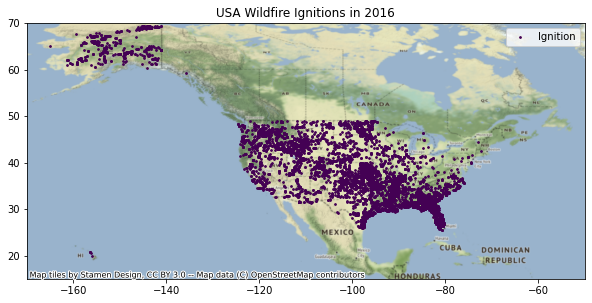

In [89]:
# plot fires over north america
fig, ax = plt.subplots(figsize=(10, 5))
ax = gpd_ignitions.plot(ax=ax, markersize=3, label="Ignition", color=viridis(0))
ax.set_xlim((-170, -50))
ax.set_ylim((15, 70))
ax.set_title(f"USA Wildfire Ignitions in 2016")
ctx.add_basemap(ax, crs=gpd_ignitions.crs)
ax.legend()
fig.savefig("final/fire_na.png")
plt.show()

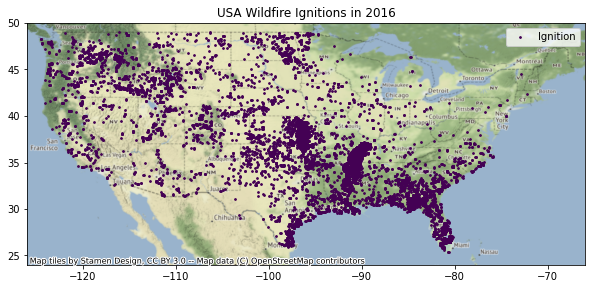

In [90]:
# plot fires over CONUS
fig, ax = plt.subplots(figsize=(10, 5))
ax = gpd_ignitions.plot(ax=ax, markersize=3, label="Ignition", color=viridis(0))
ax.set_xlim((-126, -66))
ax.set_ylim((24, 50))
ax.set_title(f"USA Wildfire Ignitions in 2016")
ctx.add_basemap(ax, crs=gpd_ignitions.crs)
ax.legend()
fig.savefig("final/fire_conus.png")
plt.show()

## Visualize Targets

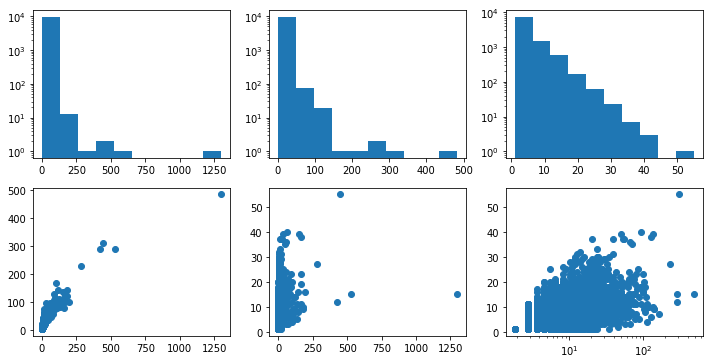

In [56]:
y = pd.read_csv("data/y.csv")
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ax = ax.ravel()

for i, target in enumerate(["size", "perimeter", "duration"]):
    ax[i].hist(y[target], log=True)
    plt.xscale("log")

for i, (target_1, target_2) in enumerate([("size", "perimeter"), ("size", "duration"), ("perimeter", "duration")]):
    ax[i+3].scatter(y[target_1], y[target_2])

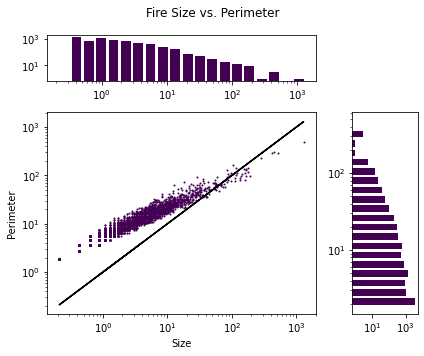

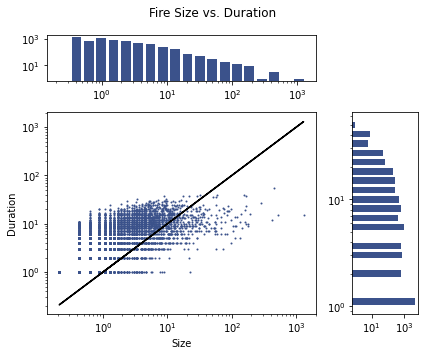

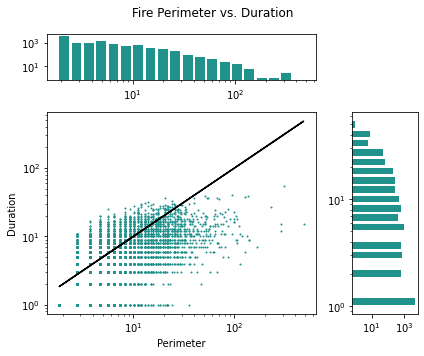

In [113]:
def joint_plot(df, var_1, var_2, title, color):
    logbins = []
    for var in [var_1, var_2]:
        hist, bins = np.histogram(df[var], bins=20)
        logbins.append(np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins)))

    fig = plt.figure(figsize=(6, 5))
    gs = GridSpec(4, 4)

    ax_scatter = fig.add_subplot(gs[1:4, 0:3])
    ax_hist_x = fig.add_subplot(gs[0,0:3])
    ax_hist_y = fig.add_subplot(gs[1:4, 3])

    ax_scatter.scatter(df[var_1], df[var_2], color=viridis(color), s=1, marker="o")
    ax_scatter.plot(df[var_1], df[var_1], color="k")
    ax_scatter.set_xlabel(var_1.capitalize())
    ax_scatter.set_ylabel(var_2.capitalize())

    ax_hist_x.hist(df[var_1], log=True, bins=logbins[0], rwidth=0.8, color=viridis(color))
    ax_hist_y.hist(df[var_2], orientation="horizontal", log=True, bins=logbins[1], rwidth=0.7, color=viridis(color))

    for ax in [ax_scatter, ax_hist_x, ax_hist_y]:
        ax.set_xscale("log")
        ax.set_yscale("log")

    fig.suptitle(title)
    fig.tight_layout()
    fig.savefig(f"final/joint_{var_1}_{var_2}.png")
    plt.show()

joint_plot(y, "size", "perimeter", "Fire Size vs. Perimeter", 0.0)
joint_plot(y, "size", "duration", "Fire Size vs. Duration", 0.25)
joint_plot(y, "perimeter", "duration", "Fire Perimeter vs. Duration", 0.5)

## NOAA Spatial Data

In [116]:
# plot distribution of weather stations over US for climate data
gsom_stations = pd.read_csv("data/ncdc_gsom_stations.csv")
normal_stations = pd.read_csv("data/ncdc_normal_mly_stations.csv")
len(gsom_stations), len(normal_stations)

(4973, 3639)

In [ ]:
stations = pd.concat((gsom_stations, normal_stations)).reset_index(drop=True)
stations

In [76]:
gpd_stations = gpd.GeoDataFrame(stations[["dataset", "longitude", "latitude"]])
gpd_stations["geometry"] = [Point((long, lat)) for _, (_, long, lat) in gpd_stations.iterrows()]
gpd_stations.crs="epsg:4326"
gpd_stations

,dataset,longitude,latitude,geometry
0,GSOM,-123.75000,48.93330,POINT (-123.75000 48.93330)
1,GSOM,-123.73330,48.73330,POINT (-123.73330 48.73330)
2,GSOM,-123.56670,48.98330,POINT (-123.56670 48.98330)
3,GSOM,-123.28330,48.76670,POINT (-123.28330 48.76670)
4,GSOM,-124.33330,48.60000,POINT (-124.33330 48.60000)
...,...,...,...,...
8607,NORMAL_MLY,-96.01667,41.36667,POINT (-96.01667 41.36667)
8608,NORMAL_MLY,-92.83889,47.38639,POINT (-92.83889 47.38639)
8609,NORMAL_MLY,-95.06778,46.90056,POINT (-95.06778 46.90056)
8610,NORMAL_MLY,-64.70130,17.74690,POINT (-64.70130 17.74690)


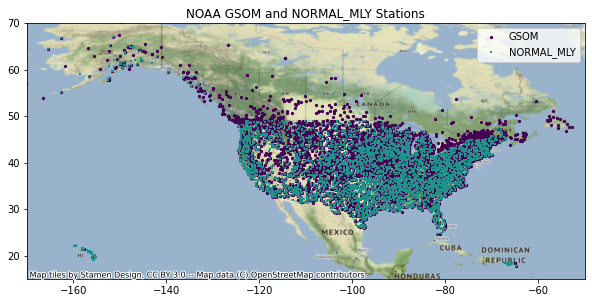

In [114]:
# plot stations in north america
fig, ax = plt.subplots(figsize=(10, 5))
ax = gpd_stations[gpd_stations["dataset"] == "GSOM"].plot(ax=ax, markersize=5, label="GSOM", color=viridis(0.0))
ax = gpd_stations[gpd_stations["dataset"] == "NORMAL_MLY"].plot(ax=ax, marker="+", markersize=5, label="NORMAL_MLY", color=viridis(0.5))
ax.set_xlim((-170, -50))
ax.set_ylim((15, 70))
ax.set_title(f"NOAA GSOM and NORMAL_MLY Stations")
ax.legend()
ctx.add_basemap(ax, crs=gpd_stations.crs)
plt.set_cmap("viridis")
fig.savefig("final/noaa_na.png")
plt.show()

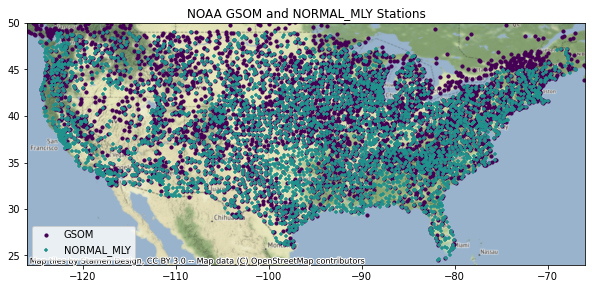

In [115]:
# plot stations in CONUS only
fig, ax = plt.subplots(figsize=(10, 5))
ax = gpd_stations[gpd_stations["dataset"] == "GSOM"].plot(ax=ax, markersize=10, label="GSOM", color=viridis(0.0))
ax = gpd_stations[gpd_stations["dataset"] == "NORMAL_MLY"].plot(ax=ax, marker="+", markersize=10, label="NORMAL_MLY", color=viridis(0.5))
ax.set_xlim((-126, -66))
ax.set_ylim((24, 50))
ax.set_title(f"NOAA GSOM and NORMAL_MLY Stations")
ax.legend()
ctx.add_basemap(ax, crs=gpd_stations.crs)
fig.savefig("final/noaa_conus.png")
plt.show()

In [84]:
cmap(10000)

(0.993248, 0.906157, 0.143936, 1.0)